In [10]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [11]:
#defiging the state
class BMIState(TypedDict):
    weight:float
    height:float
    bmi:float
    label:str
    

In [12]:
def calculate_bmi(state:BMIState)->BMIState:
    weight=state['weight']
    height=state['height']
    
    bmi=weight/(height**2)
    state['bmi']=round(bmi,2)
    return state
    

In [29]:
def label_bmi(state:BMIState)->BMIState:
    bmi=state['bmi']
    if bmi < 18.5:
       state['label']='Underweight'
    elif bmi > 18.5 and bmi < 24.9:
       state['label']='Healthly Weight'
    elif bmi > 25 and bmi < 29.9:
       state['label']='Overweight'
    else:
       state['label']='Obesity'

    return state
        
       

In [32]:
#define graph
graph=StateGraph(BMIState)

#adding nodes to graph
graph.add_node('calculate_bmi',calculate_bmi)
graph.add_node('Label_BMI',label_bmi)

#adding edge to graph
graph.add_edge(START,'calculate_bmi')
graph.add_edge('calculate_bmi','Label_BMI')
graph.add_edge('Label_BMI',END)


#compile the graph
workflow=graph.compile()

In [33]:
#execute the graph
intial_state={'weight':82,'height':1.73}
final_state=workflow.invoke(intial_state)
print(final_state)

{'weight': 82, 'height': 1.73, 'bmi': 27.4, 'label': 'Overweight'}


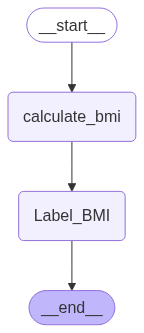

In [24]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())